In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/output/Out_20.csv', index_col=0)
df

,b1_ch1,b1_ch2,b2_ch3,b2_ch4,b3_ch5,b3_ch6,b4_ch7,b4_ch8,rul,rul_diff,group
0,,,,,,,,,,,
2003-10-22 12:06:24,0.007528,0.005833,0.009539,0.006701,0.009470,0.010432,0.004141,0.004968,-827.558889,NaN,0
2003-10-22 12:09:13,0.007091,0.005506,0.009377,0.006677,0.009814,0.010329,0.003960,0.004728,-827.511944,0.046944,0
2003-10-22 12:14:13,0.007362,0.005559,0.009378,0.006589,0.009794,0.010159,0.003932,0.004845,-827.428611,0.083333,0
2003-10-22 12:19:13,0.007162,0.005532,0.009373,0.006549,0.009525,0.010302,0.003946,0.004760,-827.345278,0.083333,0
2003-10-22 12:24:13,0.007412,0.005672,0.009128,0.006418,0.009560,0.010121,0.003744,0.004815,-827.261944,0.083333,0
...,...,...,...,...,...,...,...,...,...,...,...
2003-11-25 16:07:32,0.016315,0.011122,0.023731,0.014909,0.071464,0.074164,0.032805,0.027459,-7.540000,0.166667,10
2003-11-25 23:13:21,0.018372,0.012324,0.029176,0.021874,0.279090,0.223101,0.040227,0.032247,-0.443056,7.096944,10
2003-11-25 23:19:56,0.018249,0.012214,0.032438,0.024285,0.345026,0.275493,0.046412,0.033123,-0.333333,0.109722,10


In [3]:
df.columns

Index(['b1_ch1', 'b1_ch2', 'b2_ch3', 'b2_ch4', 'b3_ch5', 'b3_ch6', 'b4_ch7',
       'b4_ch8', 'rul', 'rul_diff', 'group'],
      dtype='object')

In [4]:
energy_data = df[['b1_ch1', 'b1_ch2', 'b2_ch3', 'b2_ch4', 'b3_ch5', 'b3_ch6', 'b4_ch7', 'b4_ch8']]
energy_data

,b1_ch1,b1_ch2,b2_ch3,b2_ch4,b3_ch5,b3_ch6,b4_ch7,b4_ch8
0,,,,,,,,
2003-10-22 12:06:24,0.007528,0.005833,0.009539,0.006701,0.009470,0.010432,0.004141,0.004968
2003-10-22 12:09:13,0.007091,0.005506,0.009377,0.006677,0.009814,0.010329,0.003960,0.004728
2003-10-22 12:14:13,0.007362,0.005559,0.009378,0.006589,0.009794,0.010159,0.003932,0.004845
2003-10-22 12:19:13,0.007162,0.005532,0.009373,0.006549,0.009525,0.010302,0.003946,0.004760
2003-10-22 12:24:13,0.007412,0.005672,0.009128,0.006418,0.009560,0.010121,0.003744,0.004815
...,...,...,...,...,...,...,...,...
2003-11-25 16:07:32,0.016315,0.011122,0.023731,0.014909,0.071464,0.074164,0.032805,0.027459
2003-11-25 23:13:21,0.018372,0.012324,0.029176,0.021874,0.279090,0.223101,0.040227,0.032247
2003-11-25 23:19:56,0.018249,0.012214,0.032438,0.024285,0.345026,0.275493,0.046412,0.033123


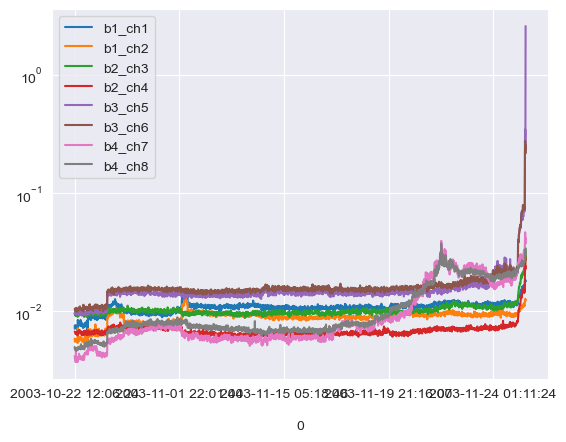

In [6]:
energy_data.plot()
plt.yscale('log')

In [7]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

log_function = FunctionTransformer(func=lambda x: np.log(x), inverse_func=lambda x: np.exp(x))
minmax_scaler = MinMaxScaler()
pca = PCA(n_components=4)


<AxesSubplot:xlabel='\n0'>

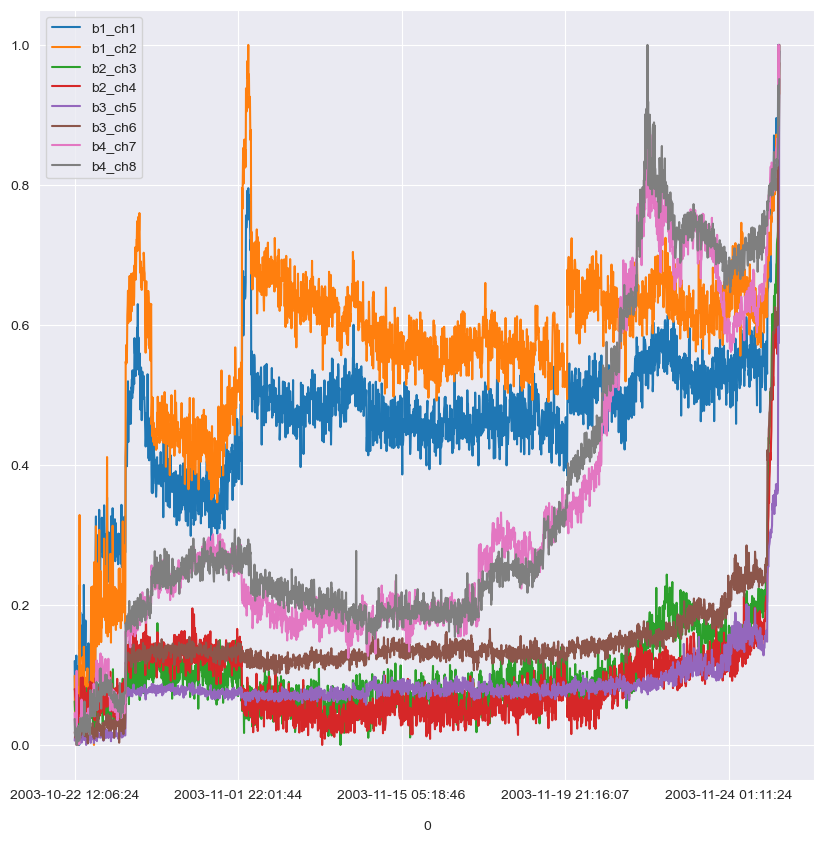

In [9]:
log_energy_data = log_function.transform(energy_data)
log_energy_data = pd.DataFrame(minmax_scaler.fit_transform(log_energy_data), columns=energy_data.columns, index=energy_data.index)
log_energy_data.plot(figsize=(10, 10))

<AxesSubplot:xlabel='\n0'>

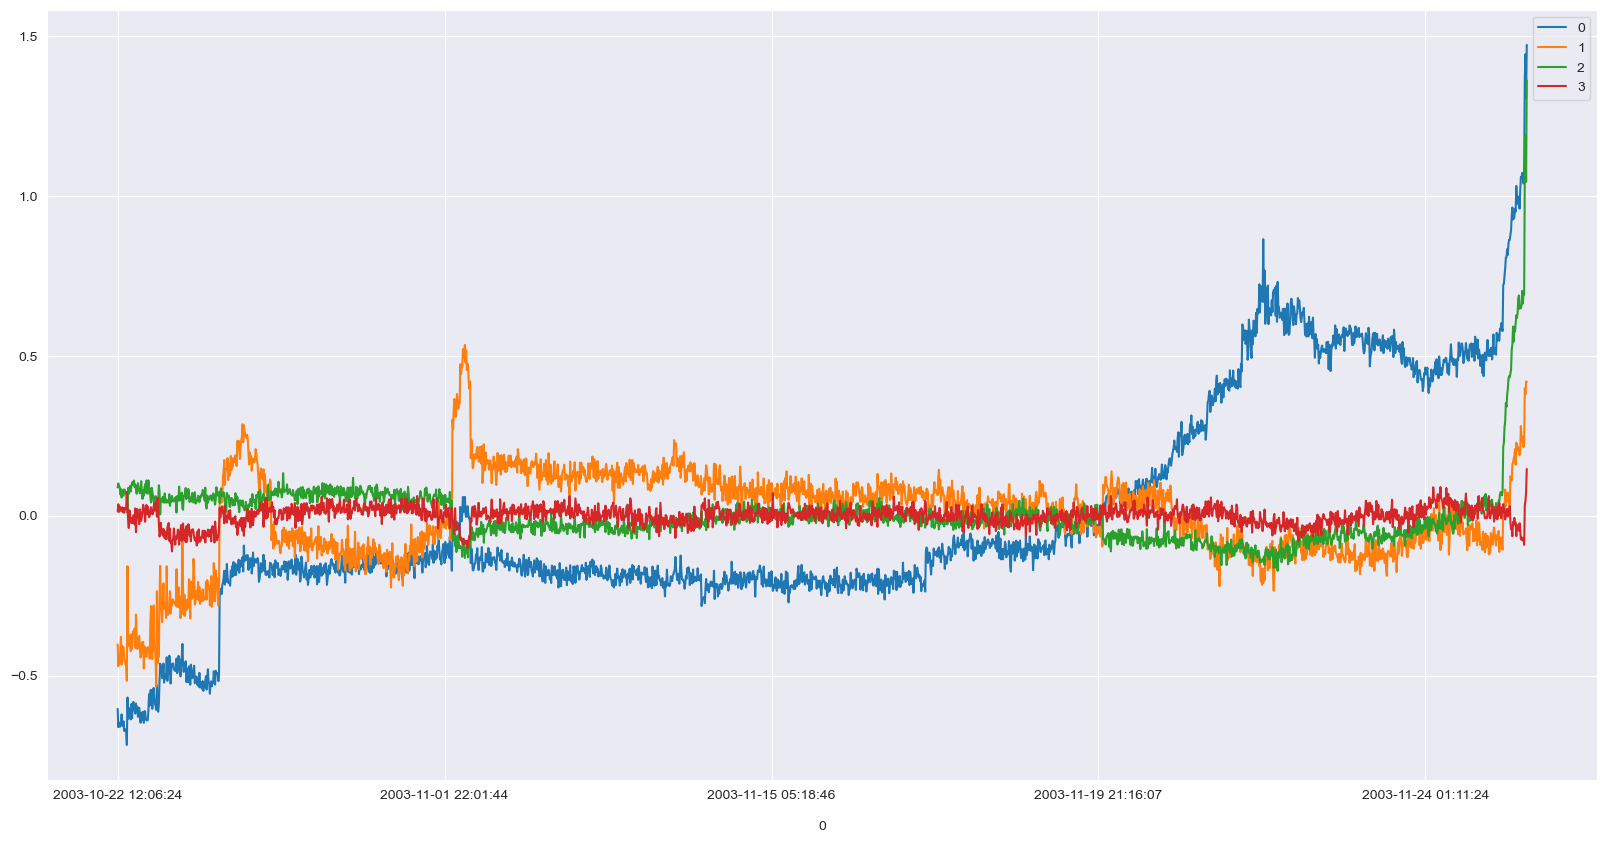

In [13]:
energy_pca = pd.DataFrame(pca.fit_transform(log_energy_data), index=energy_data.index)
energy_pca.plot(figsize=(20, 10))

In [15]:
# energy_pca新增一列数据
energy_pca['rul'] = df['rul']
energy_pca

,0,1,2,3,rul
0,,,,,
2003-10-22 12:06:24,-0.604297,-0.402645,0.088451,0.013294,-827.558889
2003-10-22 12:09:13,-0.661583,-0.470980,0.100842,0.035953,-827.511944
2003-10-22 12:14:13,-0.646810,-0.447221,0.090714,0.012025,-827.428611
2003-10-22 12:19:13,-0.659091,-0.462865,0.090454,0.028971,-827.345278
2003-10-22 12:24:13,-0.659818,-0.420878,0.066636,0.019720,-827.261944
...,...,...,...,...,...
2003-11-25 16:07:32,1.084481,0.225559,0.692513,-0.091082,-7.540000
2003-11-25 23:13:21,1.369846,0.398113,1.078403,0.032049,-0.443056
2003-11-25 23:19:56,1.444424,0.380516,1.189274,0.046499,-0.333333


<AxesSubplot:xlabel='\n0'>

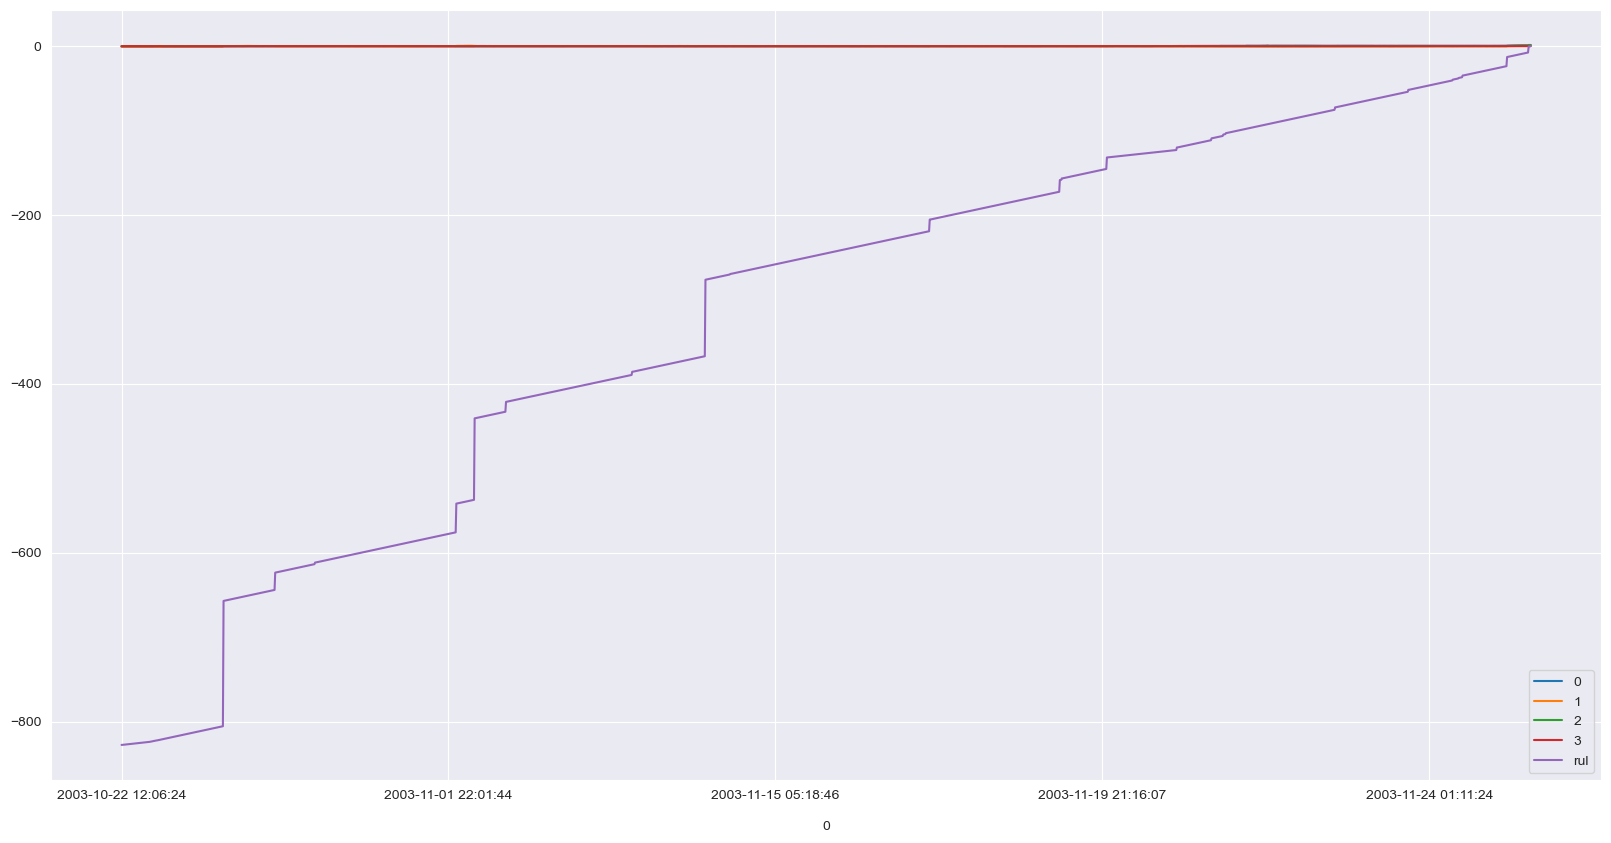

In [19]:
energy_pca.plot(figsize=(20, 10))

# RUL预测模型

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [4]:
torch.cuda.is_available()

True

In [131]:
class rul_net(nn.Module):
    def __init__(self, input_size, output_size):
        super(rul_net, self).__init__()
        layer1 = [
            nn.Conv1d(in_channels=input_size, out_channels=4, kernel_size=4, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2)
        ]
        layer2 = [
            nn.Conv1d(in_channels=4, out_channels=2, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2)
        ]
        # layer3 = [
        #     nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU()
        # ]
        # layer4 = [
        #     nn.Conv1d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU(),
        #     nn.MaxPool1d(kernel_size=2, stride=2)
        # ]

        self.conv1 = nn.Sequential(*layer1)
        self.conv2 = nn.Sequential(*layer2)
        # self.conv3 = nn.Sequential(*layer3)
        # self.conv4 = nn.Sequential(*layer4)        
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 64)
        self.fc3 = nn.Linear(64, output_size)
        pass

    def forward(self, x):
        x = x.permute(0, 2, 1)
        out = self.conv1(x)
        out = self.conv2(out)
        # out = self.conv3(out)
        # out = self.conv4(out)        
        # out = out.view(out.size(0), -1)
        out = out.permute(0, 2, 1)
        out = self.fc1(out)
        out = self.fc2(out)   
        out = self.fc3(out)
        return out
    pass

In [132]:
net = rul_net(input_size=4, output_size=31)

In [6]:
print(net)

rul_net(
  (conv1): Sequential(
    (0): Conv1d(4, 4, kernel_size=(4,), stride=(1,), padding=(1,))
    (1): ReLU()
    (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv1d(4, 2, kernel_size=(4,), stride=(2,), padding=(1,))
    (1): ReLU()
    (2): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=31, bias=True)
)


In [136]:
test = torch.randn(100, 32, 4)
test = test.cuda()

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [137]:
net(test)

RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

In [9]:
energy_data = pd.read_csv('../data/output/rul.csv', index_col=0,  sep=',', header=None)

In [10]:
energy_data

,1,2,3,4,5
0,,,,,
2003-10-22 12:06:24,-0.604297,-0.402645,0.088451,0.013294,-827.558889
2003-10-22 12:09:13,-0.661583,-0.470980,0.100842,0.035953,-827.511944
2003-10-22 12:14:13,-0.646810,-0.447221,0.090714,0.012025,-827.428611
2003-10-22 12:19:13,-0.659091,-0.462865,0.090454,0.028971,-827.345278
2003-10-22 12:24:13,-0.659818,-0.420878,0.066636,0.019720,-827.261944
...,...,...,...,...,...
2003-11-25 16:07:32,1.084481,0.225559,0.692513,-0.091082,-7.540000
2003-11-25 23:13:21,1.369846,0.398113,1.078403,0.032049,-0.443056
2003-11-25 23:19:56,1.444424,0.380516,1.189274,0.046499,-0.333333


In [11]:
data_x =  energy_data.iloc[:, 0:4].values
data_x

array([[-0.604297, -0.402645,  0.088451,  0.013294],
       [-0.661583, -0.47098 ,  0.100842,  0.035953],
       [-0.64681 , -0.447221,  0.090714,  0.012025],
       ...,
       [ 1.444424,  0.380516,  1.189274,  0.046499],
       [ 1.305955,  0.419999,  1.045057,  0.074624],
       [ 1.473284,  0.418956,  1.362766,  0.146563]])

In [12]:
data_y = energy_data.iloc[:, 4].values
data_y

array([-8.27558889e+02, -8.27511944e+02, -8.27428611e+02, ...,
       -3.33333000e-01, -1.66667000e-01,  0.00000000e+00])

In [55]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer

scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 30))
log_function = FunctionTransformer(func=lambda x: np.int64(x / 24), inverse_func=lambda x: np.int64(x * 24))
lg_f = FunctionTransformer(func=lambda x: np.log(x), inverse_func=lambda x: np.exp(x))
y_log = log_function.fit_transform(data_y.reshape(-1, 1))
y =  scaler_y.fit_transform(y_log.reshape(-1, 1))

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:137: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


In [173]:
y = np.where(y < 23, 0, 1)
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

onehot测试

In [56]:
num_class = 31
one_hot = np.eye(num_class)[np.int64(y)]
one_hot

array([[[1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 1.]],

       [[0., 0., 0., ..., 0., 0., 1.]],

       [[0., 0., 0., ..., 0., 0., 1.]]])

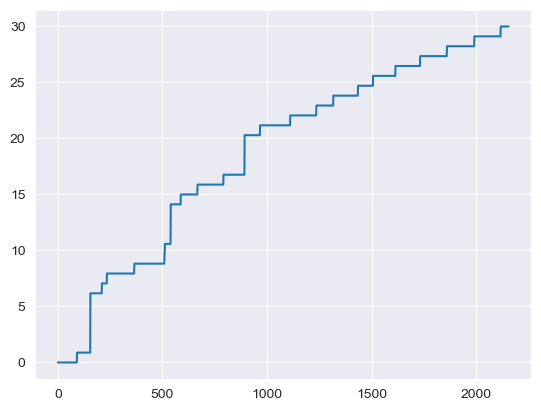

In [57]:
plt.plot(y)

In [498]:
log_function.inverse_transform(y_log)

array([[-816],
       [-816],
       [-816],
       ...,
       [   0],
       [   0],
       [   0]])

In [58]:
# x = lg_f.fit_transform(data_x)
x = scaler_x.fit_transform(data_x)


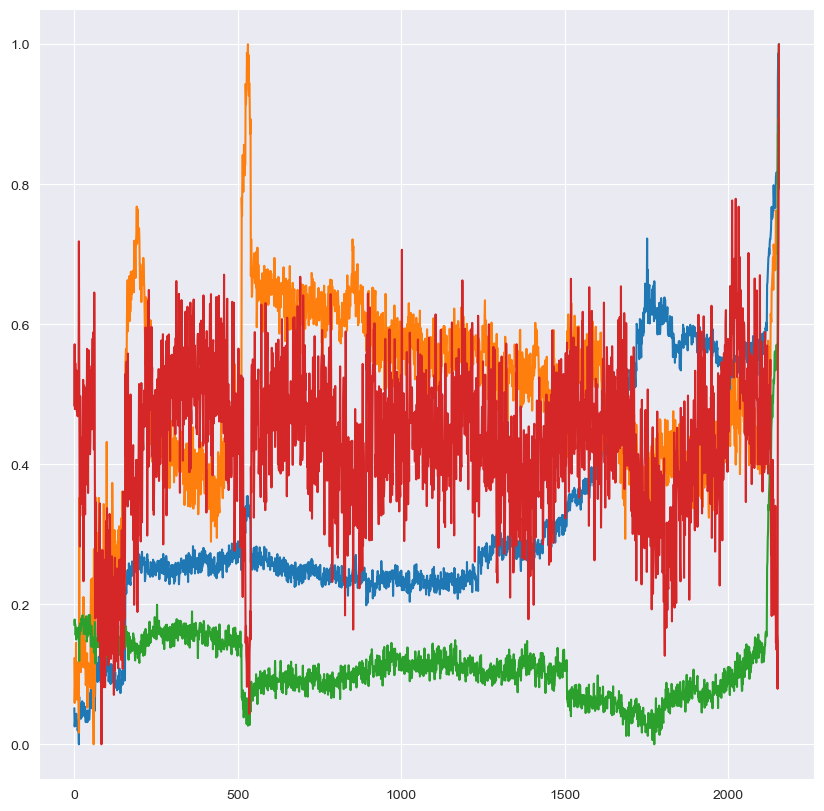

In [59]:
plt.figure(figsize=(10, 10))
plt.plot(x)

In [60]:
x

array([[0.05155202, 0.12301286, 0.17014255, 0.48364162],
       [0.02540007, 0.05905081, 0.17821179, 0.57143521],
       [0.03214417, 0.08128941, 0.17161625, 0.47872481],
       ...,
       [0.98682496, 0.85605709, 0.88701881, 0.6122963 ],
       [0.92361171, 0.89301346, 0.79310203, 0.72126822],
       [1.        , 0.8920372 , 1.        , 1.        ]])

In [179]:
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [105]:
x_new = []
y_new = []
for i in range(len(x) - 16):
    x_new.append(x[i : i + 16])
    y_new.append(one_hot[i + 16])
    pass
x_new = np.array(x_new)
y_new = np.array(y_new)
y_new

array([[[1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 1.]],

       [[0., 0., 0., ..., 0., 0., 1.]],

       [[0., 0., 0., ..., 0., 0., 1.]]])

In [106]:
tensor_x = torch.Tensor(x_new)
tensor_y = torch.Tensor(y_new)

In [107]:
tensor_x

tensor([[[0.0516, 0.1230, 0.1701, 0.4836],
         [0.0254, 0.0591, 0.1782, 0.5714],
         [0.0321, 0.0813, 0.1716, 0.4787],
         ...,
         [0.0190, 0.0639, 0.1605, 0.5369],
         [0.0000, 0.0166, 0.1509, 0.7185],
         [0.0677, 0.3522, 0.1190, 0.5226]],

        [[0.0254, 0.0591, 0.1782, 0.5714],
         [0.0321, 0.0813, 0.1716, 0.4787],
         [0.0265, 0.0666, 0.1714, 0.5444],
         ...,
         [0.0000, 0.0166, 0.1509, 0.7185],
         [0.0677, 0.3522, 0.1190, 0.5226],
         [0.0374, 0.1173, 0.1692, 0.3800]],

        [[0.0321, 0.0813, 0.1716, 0.4787],
         [0.0265, 0.0666, 0.1714, 0.5444],
         [0.0262, 0.1059, 0.1559, 0.5085],
         ...,
         [0.0677, 0.3522, 0.1190, 0.5226],
         [0.0374, 0.1173, 0.1692, 0.3800],
         [0.0529, 0.1502, 0.1569, 0.2826]],

        ...,

        [[0.7657, 0.6954, 0.4880, 0.3345],
         [0.7619, 0.6493, 0.5047, 0.3504],
         [0.7986, 0.7140, 0.5210, 0.1850],
         ...,
         [0.8021, 0.7

In [20]:
sss = tensor_y.cpu().numpy()
sss

array([[[1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 1.]],

       [[0., 0., 0., ..., 0., 0., 1.]],

       [[0., 0., 0., ..., 0., 0., 1.]]], dtype=float32)

In [64]:
tensor_y.size()

torch.Size([2124, 1, 31])

In [127]:
tensor_x = tensor_x.unsqueeze(1)

In [65]:
tensor_x

tensor([[[0.0516, 0.1230, 0.1701, 0.4836],
         [0.0254, 0.0591, 0.1782, 0.5714],
         [0.0321, 0.0813, 0.1716, 0.4787],
         ...,
         [0.0494, 0.1493, 0.1574, 0.4428],
         [0.0547, 0.1098, 0.1659, 0.5124],
         [0.0401, 0.1160, 0.1788, 0.4136]],

        [[0.0254, 0.0591, 0.1782, 0.5714],
         [0.0321, 0.0813, 0.1716, 0.4787],
         [0.0265, 0.0666, 0.1714, 0.5444],
         ...,
         [0.0547, 0.1098, 0.1659, 0.5124],
         [0.0401, 0.1160, 0.1788, 0.4136],
         [0.0473, 0.1383, 0.1686, 0.4158]],

        [[0.0321, 0.0813, 0.1716, 0.4787],
         [0.0265, 0.0666, 0.1714, 0.5444],
         [0.0262, 0.1059, 0.1559, 0.5085],
         ...,
         [0.0401, 0.1160, 0.1788, 0.4136],
         [0.0473, 0.1383, 0.1686, 0.4158],
         [0.0531, 0.1479, 0.1624, 0.3284]],

        ...,

        [[0.6702, 0.5022, 0.2936, 0.4383],
         [0.6810, 0.5766, 0.3047, 0.3866],
         [0.6962, 0.5296, 0.3421, 0.4294],
         ...,
         [0.8021, 0.7

In [66]:
torch.cuda.is_available()

True

In [108]:
if torch.cuda.is_available():
    tensor_x = tensor_x.cuda()
    tensor_y =  tensor_y.cuda()
    tensor_x = tensor_x.float()
    tensor_y = tensor_y.long()
    net = net.cuda()
    
# net = net.cpu()
# tensor_x = tensor_x.cpu()
# tensor_y = tensor_y.cpu()

In [109]:
from torch.utils.data import TensorDataset, DataLoader

# tensor_y = tensor_y.squeeze(2)

dateset_tensor = TensorDataset(tensor_x, tensor_y)
data_loader = DataLoader(dataset=dateset_tensor, batch_size=128, shuffle=True)

In [110]:
for data in data_loader:
    X, Y = data
    print(X.shape)
    print(X)
    print(Y.shape)
    print(Y)

torch.Size([128, 16, 4])
tensor([[[0.2385, 0.5697, 0.0839, 0.4630],
         [0.2475, 0.6164, 0.1104, 0.3568],
         [0.2290, 0.5486, 0.1148, 0.3291],
         ...,
         [0.2269, 0.5835, 0.1061, 0.3997],
         [0.2367, 0.5819, 0.1265, 0.3772],
         [0.2463, 0.5872, 0.1414, 0.4881]],

        [[0.2173, 0.5528, 0.1038, 0.6020],
         [0.2335, 0.5836, 0.1162, 0.4969],
         [0.2570, 0.5616, 0.1240, 0.3310],
         ...,
         [0.2302, 0.5540, 0.1159, 0.4944],
         [0.2272, 0.5719, 0.0991, 0.3471],
         [0.2270, 0.5528, 0.1171, 0.4687]],

        [[0.5647, 0.4802, 0.1527, 0.5130],
         [0.5567, 0.4487, 0.1356, 0.4955],
         [0.5415, 0.4149, 0.1259, 0.5377],
         ...,
         [0.5785, 0.4410, 0.1352, 0.4669],
         [0.5617, 0.4353, 0.1479, 0.5397],
         [0.5558, 0.3864, 0.1430, 0.6701]],

        ...,

        [[0.2152, 0.5510, 0.1597, 0.4120],
         [0.2230, 0.5646, 0.1684, 0.5090],
         [0.2156, 0.5382, 0.1530, 0.5151],
         .

In [134]:
from torch import optim


def train(module=nn.Module, data_loader=torch.utils.data.DataLoader, epochs=int):
    loss_function = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(module.parameters(), lr=0.01)
    reducer = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                                  mode='min', factor=0.1, patience=10,
                                                  verbose=False, threshold=1e-4, threshold_mode='rel',
                                                  cooldown=0, min_lr=0, eps=1e-8)
    
    if torch.cuda.is_available():
        loss_function = loss_function.cuda()
        module = module.cuda()
        pass
    
    train_hist = np.zeros(epochs)
    
    for i in range(epochs):
        for x_t, y_t in data_loader:
            pre = module(x_t)
            # pre = pre.unsqueeze(1)
            # y_t = y_t.squeeze(1)
            tr_loss = loss_function(pre, y_t)
            # tr_loss.requires_grad_(True)
            
            # if i % 10 == 0:
            #     print(f'Epoch {i} train loss: {tr_loss.item()}')
            #     pass
            # 
            # train_hist[i] = tr_loss.item()
            # prediction = torch.max(F.softmax(pre), 1)[1]
            # prediction = prediction.cpu()
            # prediction = prediction.detach().numpy()
            # target = y_t.cpu().numpy()
            # acc = np.sum(prediction == target)
            # train_hist[i] = acc
            
            optimizer.zero_grad()
            tr_loss.backward()
            optimizer.step()
            reducer.step(tr_loss)
        pass

    return module.eval(), train_hist
    
    pass


In [22]:
net = net.train()

In [29]:
torch.backends.cudnn.benchmark = True
torch.backends.cudnn.benchmark = True

In [135]:
module, train_history = train(module=net, data_loader=data_loader, epochs=500)

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [45]:
print(torch.backends.cudnn.version())

8500


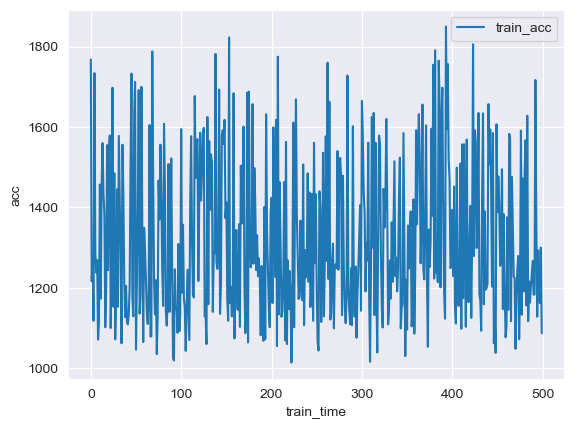

In [248]:
plt.figure(1)
plt.plot(train_history, label='train_acc')
plt.ylabel('acc')
plt.xlabel('train_time')
plt.legend()
plt.show()

In [129]:
y_out = module(tensor_x)

# y_out = F.softmax(y_out, dim=2)
# y_out = y_out.cpu().squeeze(1)
# y_out = y_out.detach().numpy()

In [130]:
y_out.size()

torch.Size([2140, 2, 31])

In [127]:
y_out

array([[[[ 0.03670098, -0.16050857,  0.06530441, ..., -0.2086132 ,
           0.05447727,  0.16288221],
         [ 0.03679565, -0.16013321,  0.06466997, ..., -0.20349108,
           0.0571505 ,  0.16508743]]],


       [[[ 0.0367346 , -0.1603753 ,  0.06507914, ..., -0.2067946 ,
           0.05542642,  0.16366518],
         [ 0.03677815, -0.1602025 ,  0.06478707, ..., -0.20443632,
           0.0566572 ,  0.16468053]]],


       [[[ 0.03670663, -0.16048631,  0.06526679, ..., -0.20830925,
           0.05463593,  0.16301313],
         [ 0.03681031, -0.1600749 ,  0.06457146, ..., -0.20269571,
           0.05756558,  0.16542985]]],


       ...,


       [[[ 0.03665826, -0.16235635,  0.06722356, ..., -0.22426687,
           0.04523967,  0.15391912],
         [ 0.03694864, -0.16260394,  0.06663816, ..., -0.21967344,
           0.04674608,  0.15404195]]],


       [[[ 0.03669822, -0.16265693,  0.06740225, ..., -0.225753  ,
           0.04417192,  0.15267104],
         [ 0.03665535, -0.16282693

In [103]:
y_out_pre = np.argmax(y_out, axis=1)
y_out_pre

array([30, 30, 30, ..., 30, 30, 30], dtype=int64)

In [51]:
y_out = log_function.inverse_transform(y_out)
y = data_y

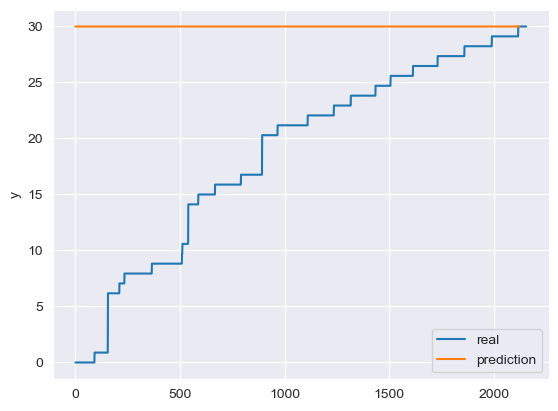

In [104]:
plt.figure(2)
plt.plot(y, label='real')
plt.plot(y_out_pre, label='prediction')
plt.ylabel('y')
plt.legend()


In [53]:
(y == y_out)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17068\2978160790.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  (y == y_out)


False

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


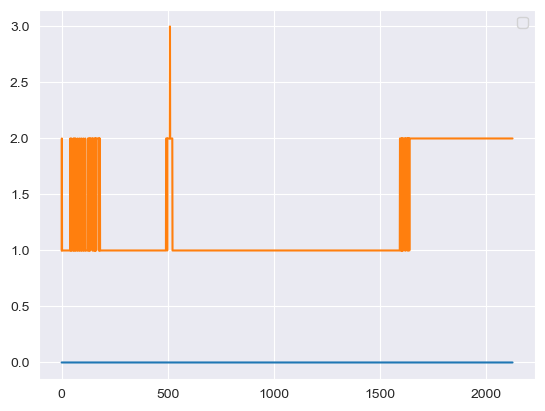

In [168]:
plt.plot(y_out)
plt.legend()

RuntimeError: The size of tensor a (64) must match the size of tensor b (31) at non-singleton dimension 2